The dataset contains real estate sales records in NYC.
The following code performs an exploratory analysis on this dataset.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pathlib import Path
from openFile import OpenCleanFile


Obtain the data. An explanation for each data column can be found on the NYC website: https://www.nyc.gov/site/finance/taxes/

The data is obtained from a file derived from the original nyc-rolling-sales.csv file which was cleaned
in the Task1_clean.ipynb Jupyter Notebook. 
This code should always be run first to create this file.
---
A class was created: OpenCleanFile to create a dataframe populated by this file.
It loads the dataframe and sets the data type for each column.
This same code has to be run everytime this file is opened, which is why this class 
has been created.

In [6]:

clean = OpenCleanFile()
borough_names= ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
clean.df_housing.info()    
clean.df_housing.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    8482 non-null   category      
 1   BUILDING CLASS CATEGORY         8482 non-null   category      
 2   TAX CLASS AT PRESENT            8482 non-null   category      
 3   BLOCK                           8482 non-null   category      
 4   RESIDENTIAL UNITS               8482 non-null   int64         
 5   COMMERCIAL UNITS                8482 non-null   int64         
 6   TOTAL UNITS                     8482 non-null   int64         
 7   LAND SQUARE FEET                8482 non-null   int64         
 8   GROSS SQUARE FEET               8482 non-null   int64         
 9   YEAR BUILT                      8482 non-null   int64         
 10  TAX CLASS AT TIME OF SALE       8482 non-null   category      
 11  BUIL

,count,mean,std,min,25%,50%,75%,max
RESIDENTIAL UNITS,8482.00000,6.25253,26.53003,0.00000,2.00000,2.00000,3.00000,948.00000
COMMERCIAL UNITS,8482.00000,0.84626,25.52568,0.00000,0.00000,0.00000,0.00000,2261.00000
TOTAL UNITS,8482.00000,7.09703,36.91645,0.00000,2.00000,3.00000,4.00000,2261.00000
LAND SQUARE FEET,8482.00000,3275.63535,10583.56031,200.00000,1742.00000,2000.00000,2500.00000,679000.00000
GROSS SQUARE FEET,8482.00000,8606.53914,31728.74181,700.00000,2295.00000,3007.50000,4180.00000,1021752.00000
YEAR BUILT,8482.00000,1935.27211,34.61093,1800.00000,1910.00000,1926.00000,1955.00000,2016.00000
SALE PRICE,8482.00000,3292418.86666,12299057.51319,2000.00000,560000.00000,975250.00000,1879752.50000,330000000.00000
SALE_MONTH,8482.00000,6.52051,3.48448,1.00000,3.00000,6.00000,9.00000,12.00000
AGE,8482.00000,86.72789,34.61093,6.00000,67.00000,96.00000,112.00000,222.00000


<AxesSubplot:xlabel='BOROUGH_NAME', ylabel='Count'>

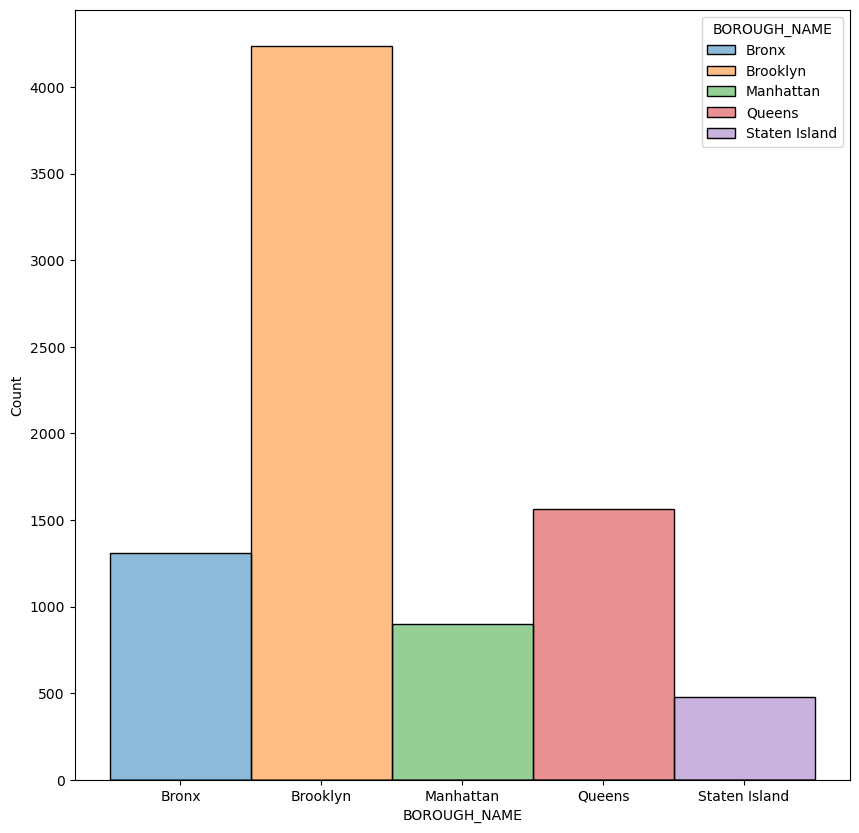

In [7]:
plt.figure(figsize = (10,10))
sns.histplot(data=clean.df_housing, x="BOROUGH_NAME", hue="BOROUGH_NAME", hue_order=borough_names)

Now the data is ready for EDA. Some of the data is categorical and some of data is continuous.

Lets look at the age of the property and the sales price

<AxesSubplot:xlabel='AGE', ylabel='SALE PRICE'>

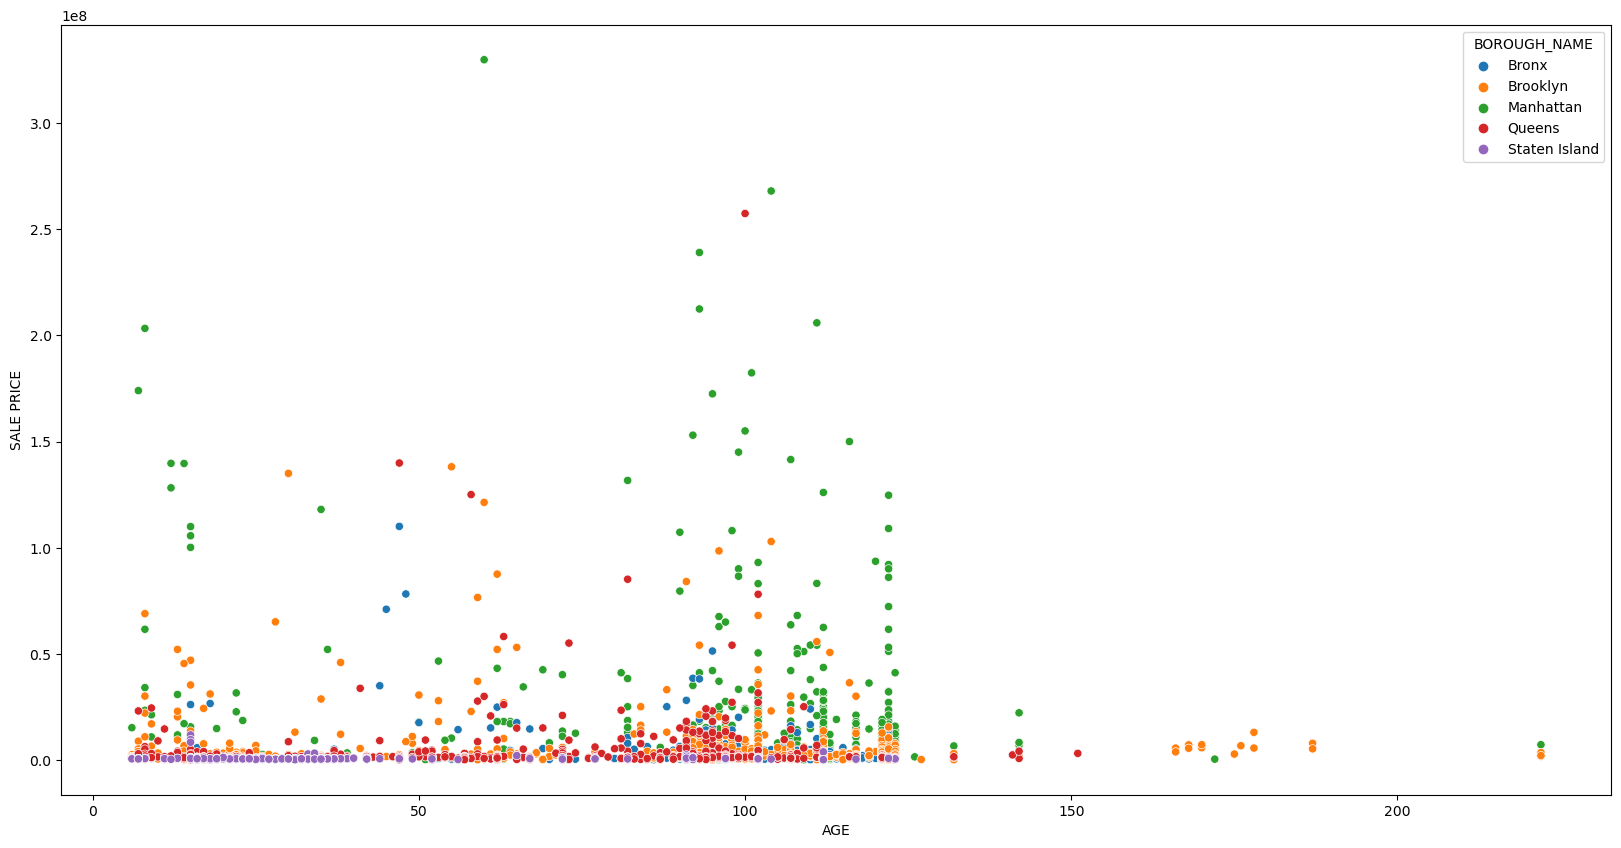

In [8]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=clean.df_housing, x="AGE", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)


Lets see the distribution of sales prices

<AxesSubplot:xlabel='SALE DATE', ylabel='SALE PRICE'>

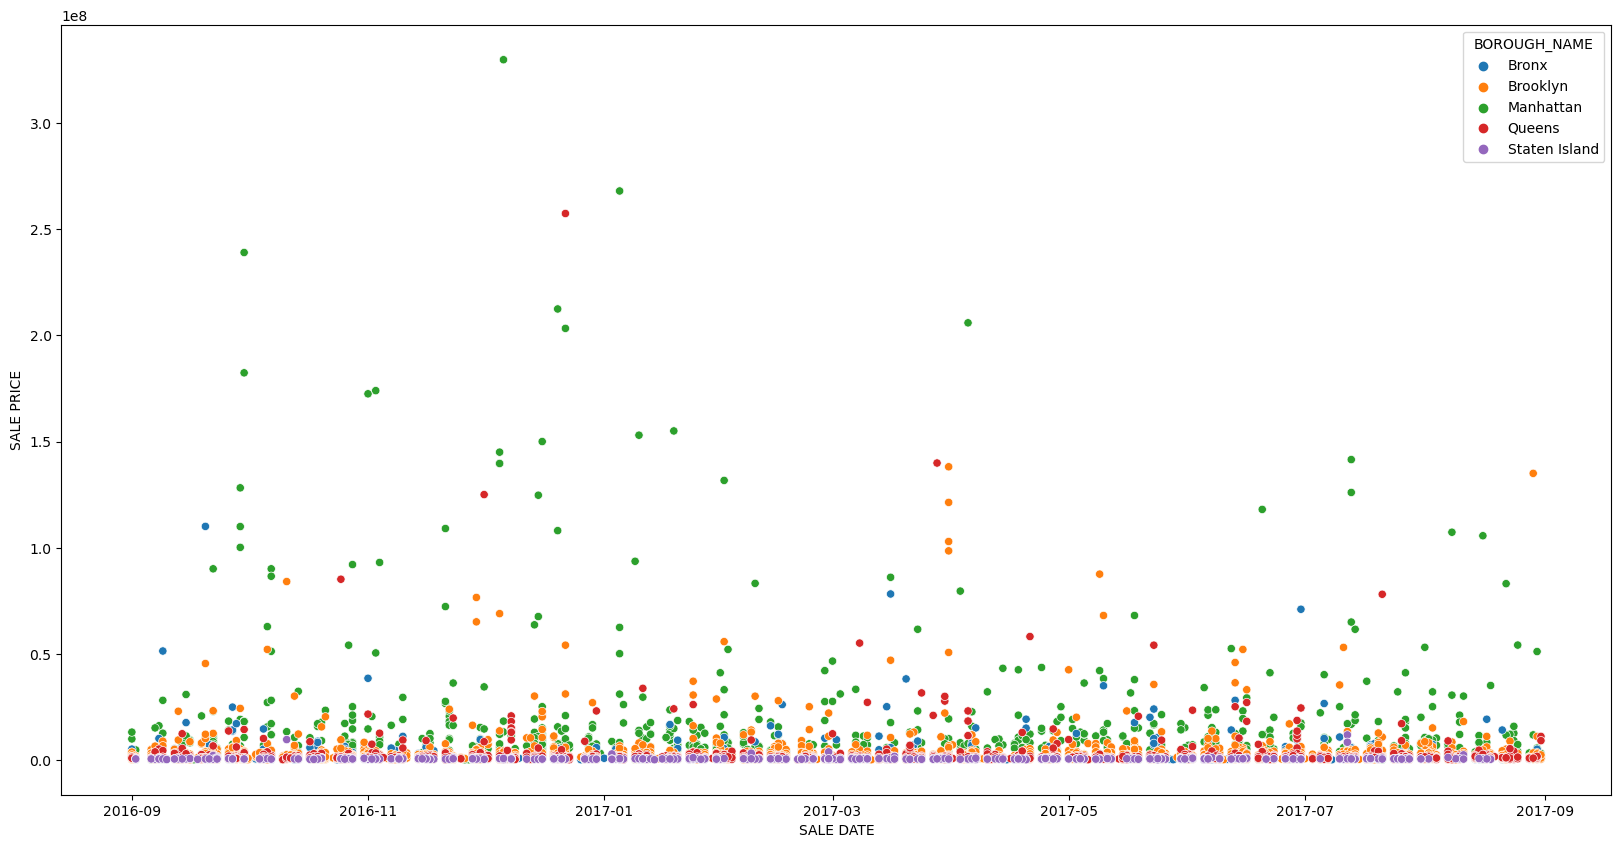

In [9]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=clean.df_housing, x="SALE DATE", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)

<AxesSubplot:xlabel='SALE_MONTH', ylabel='SALE PRICE'>

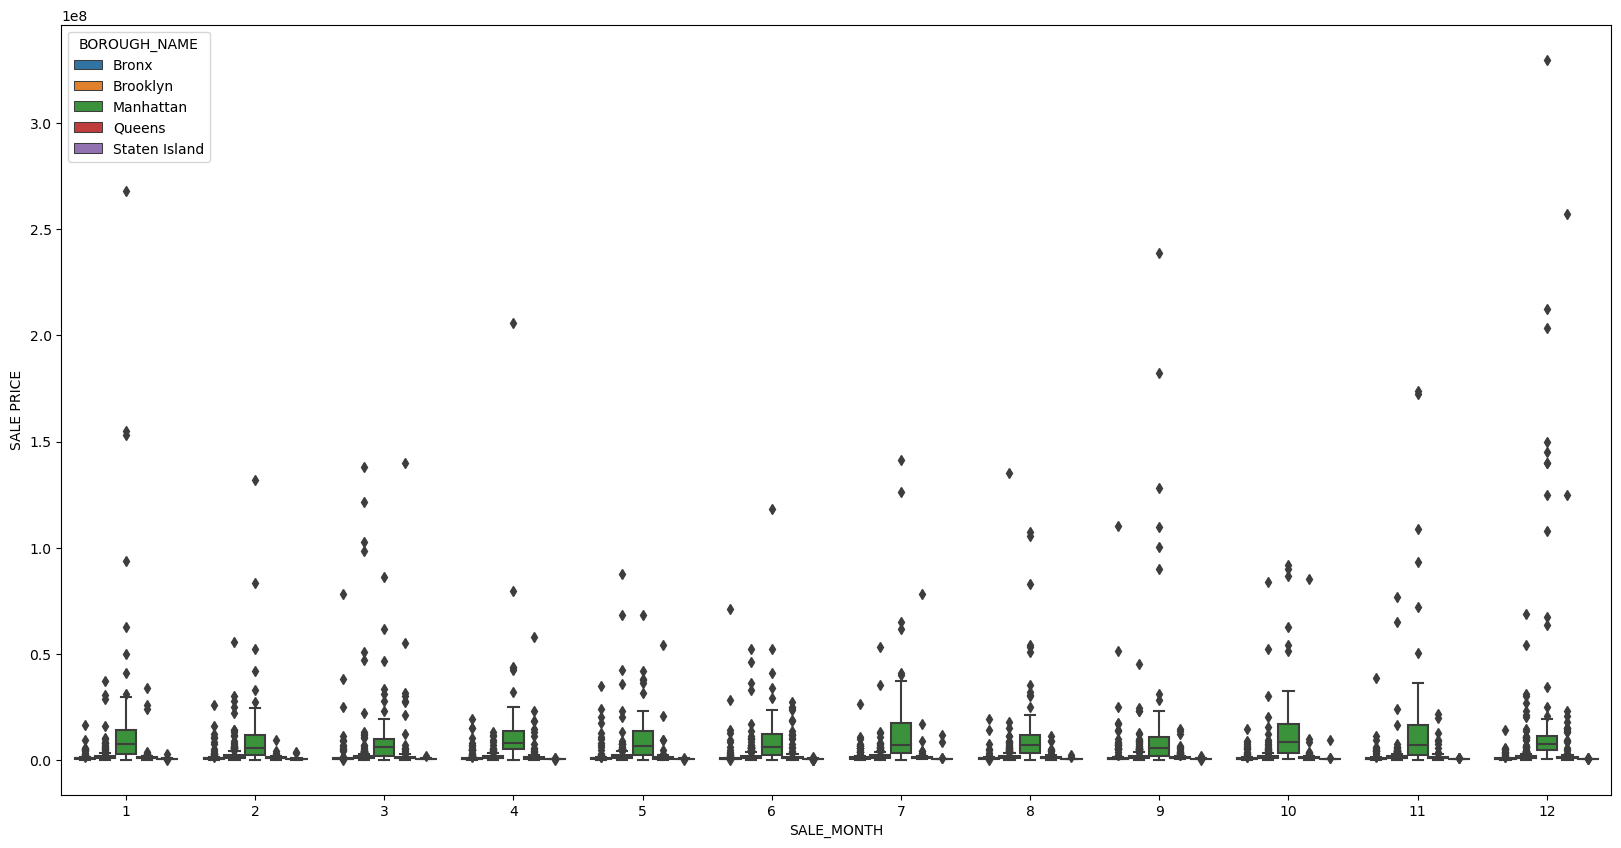

In [21]:
plt.figure(figsize = (20,10))
plt.title("Sales prices per month per borough")
sns.boxplot(data=clean.df_housing, x="SALE_MONTH", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)

<AxesSubplot:xlabel='SALE_MONTH', ylabel='SALE PRICE'>

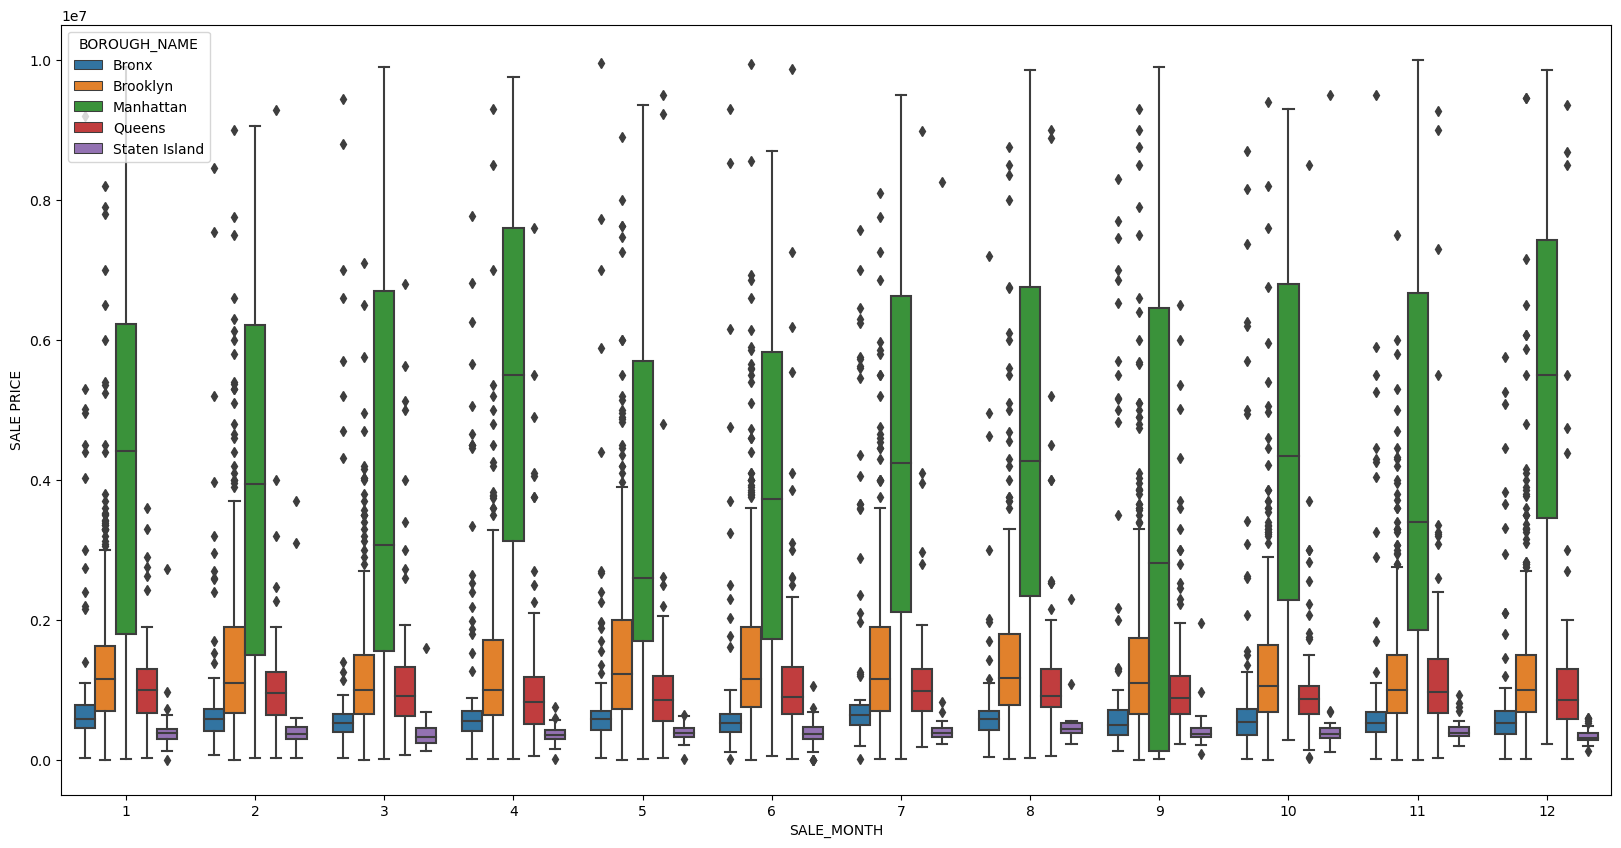

In [22]:

plt.figure(figsize = (20,10))
plt.title("Sales prices per month per borough without outliers")
df_new_housing = clean.df_housing[clean.df_housing["SALE PRICE"] < 10000000]
sns.boxplot(data=df_new_housing, x="SALE_MONTH", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)

<AxesSubplot:xlabel='SALE PRICE', ylabel='Count'>

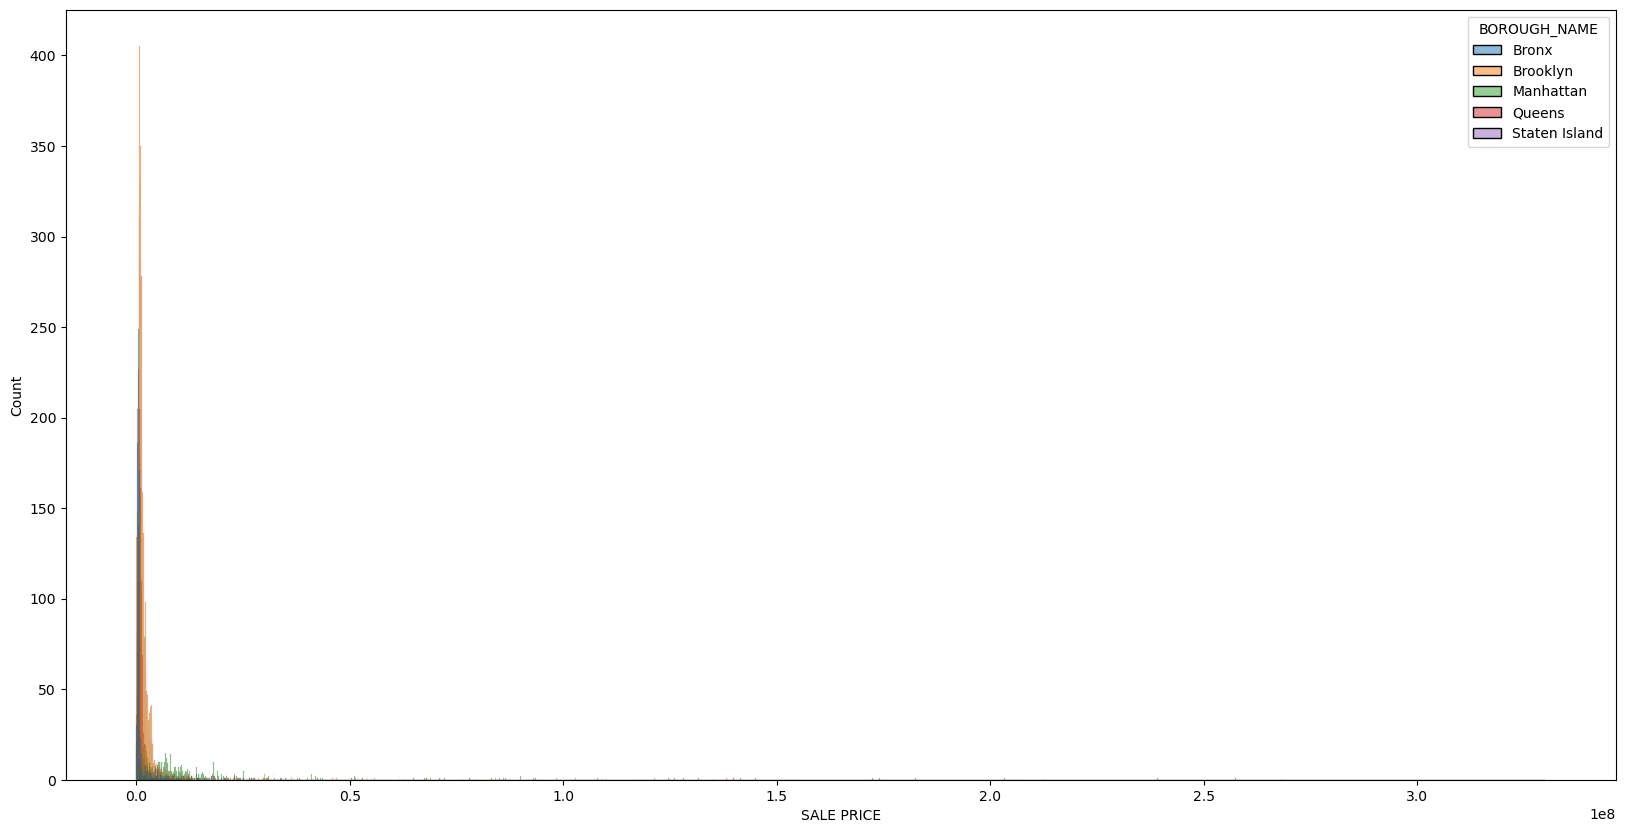

In [11]:
plt.figure(figsize = (20,10))
plt.title("Sale Price")
sns.histplot(data=clean.df_housing, x="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)

It is hard to see the distribution of Sales Prices because of the effect of the outliers
on the scaling of the chart.
Here the exercise is repeated with the outliers removed.

<AxesSubplot:xlabel='SALE PRICE', ylabel='Count'>

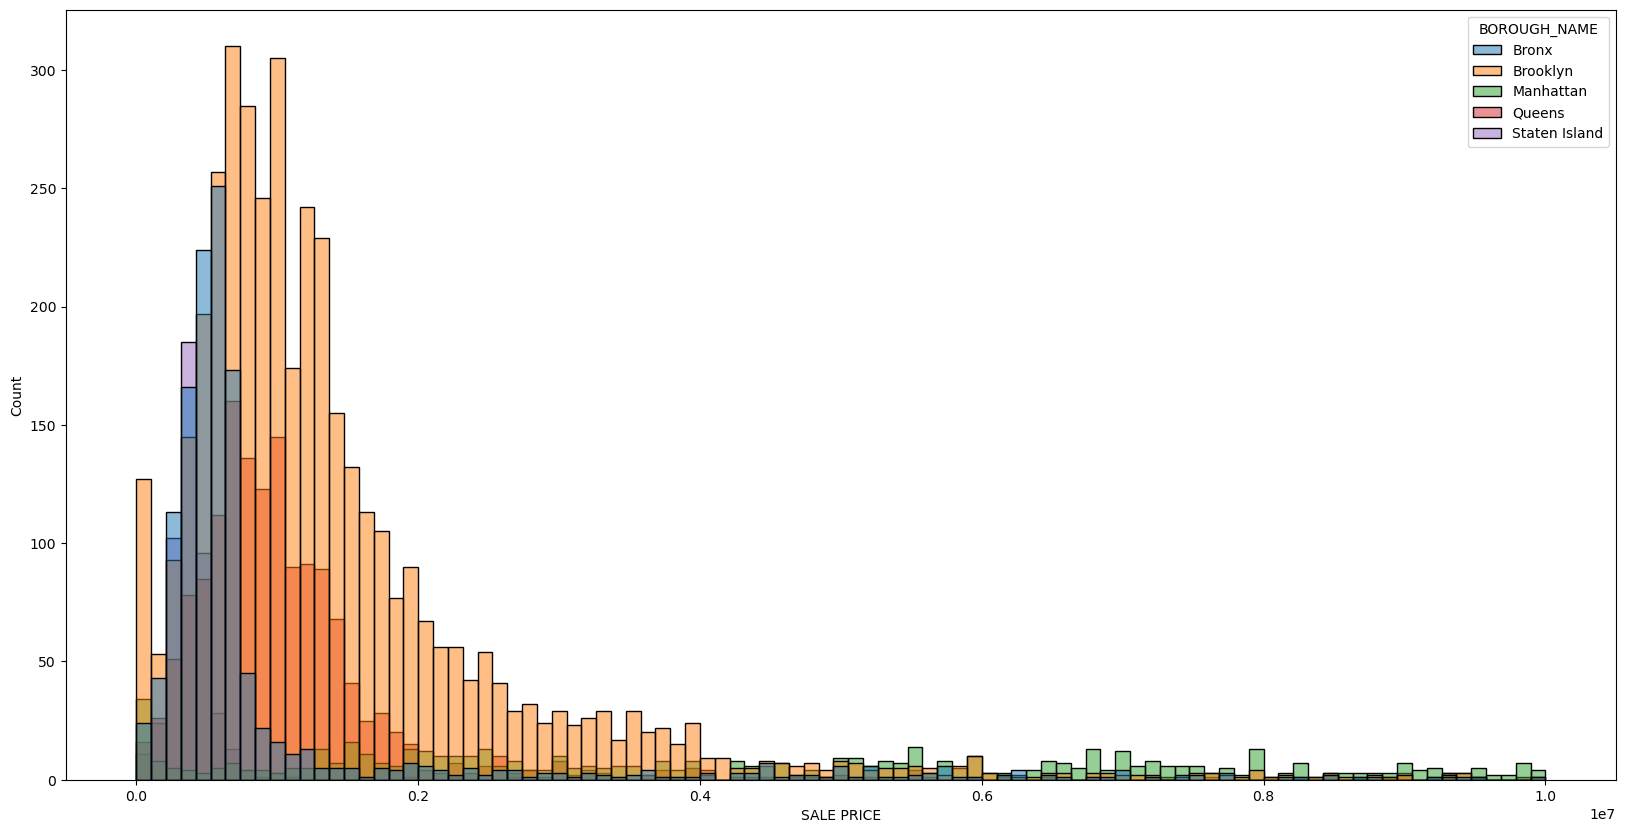

In [12]:
df_new_housing = clean.df_housing[clean.df_housing["SALE PRICE"] < 10000000]
plt.figure(figsize = (20,10))
plt.title("Sale Price with outliers removed")
sns.histplot(data=df_new_housing, x="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)


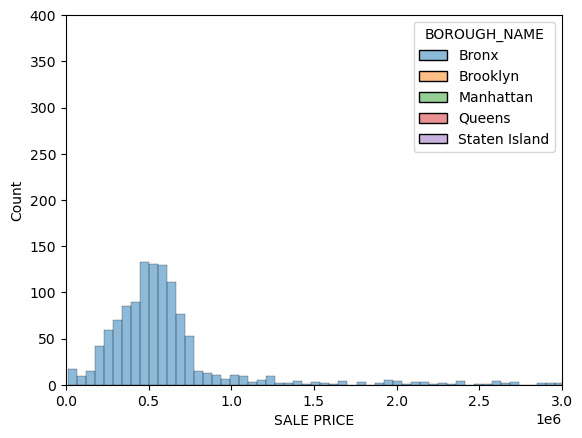

<Figure size 2000x1000 with 0 Axes>

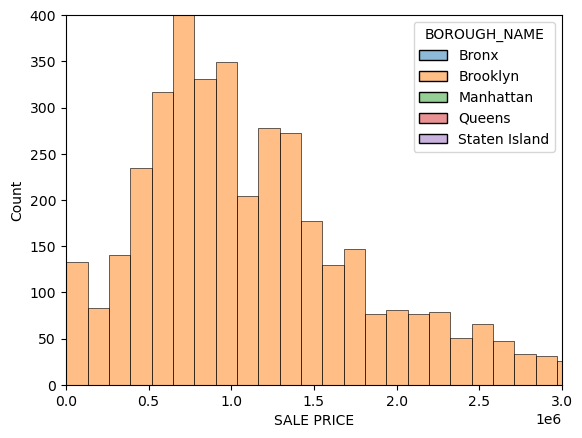

<Figure size 2000x1000 with 0 Axes>

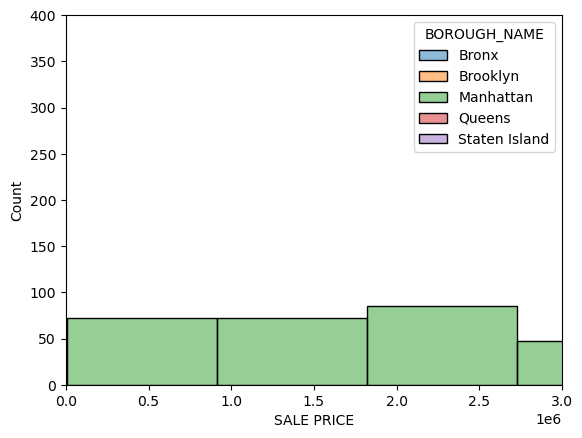

<Figure size 2000x1000 with 0 Axes>

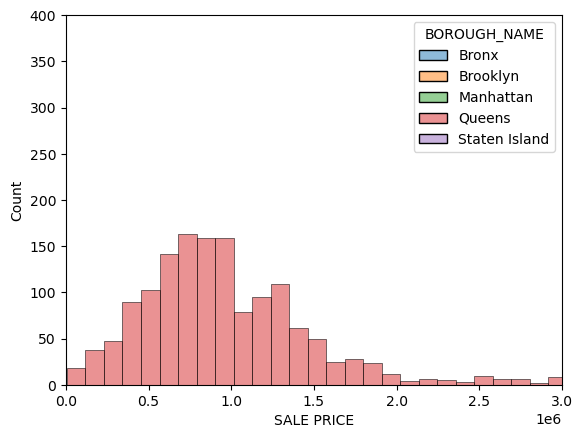

<Figure size 2000x1000 with 0 Axes>

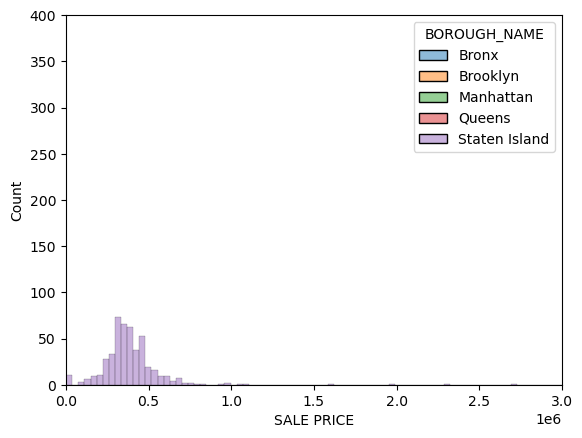

<Figure size 2000x1000 with 0 Axes>

In [13]:

for name in borough_names:
    fig, ax = plt.subplots()
    df_borough_housing = df_new_housing[df_new_housing["BOROUGH_NAME"] == name]
    plt.figure(figsize = (20,10))
    plt.title(f"Sale Price for {name}")
    sns.histplot(data=df_borough_housing, x="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names, ax=ax)
    ax.set_xlim(0,3000000)
    ax.set_ylim(0,400)

Check for correlation between TAX CLASS AT TIME OF SALE and BOROUGH_NAME

<AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE', ylabel='count'>

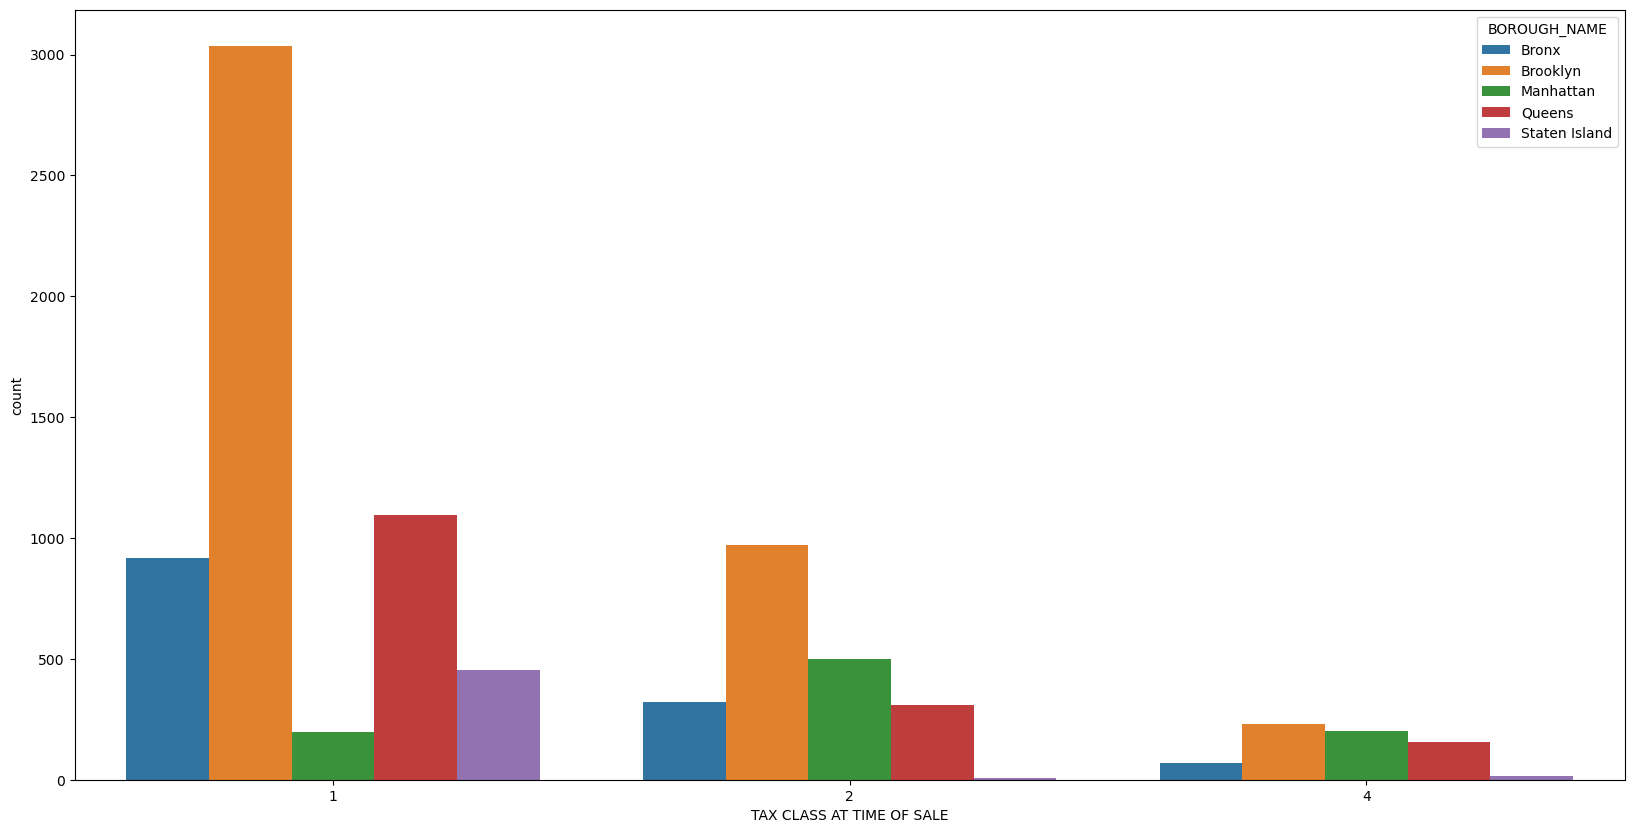

In [14]:
plt.figure(figsize = (20,10))
plt.title(f"Tax class at the time of sale for each borough")
sns.countplot(data=clean.df_housing, x="TAX CLASS AT TIME OF SALE", hue="BOROUGH_NAME", hue_order=borough_names)

<AxesSubplot:xlabel='BLOCK', ylabel='SALE PRICE'>

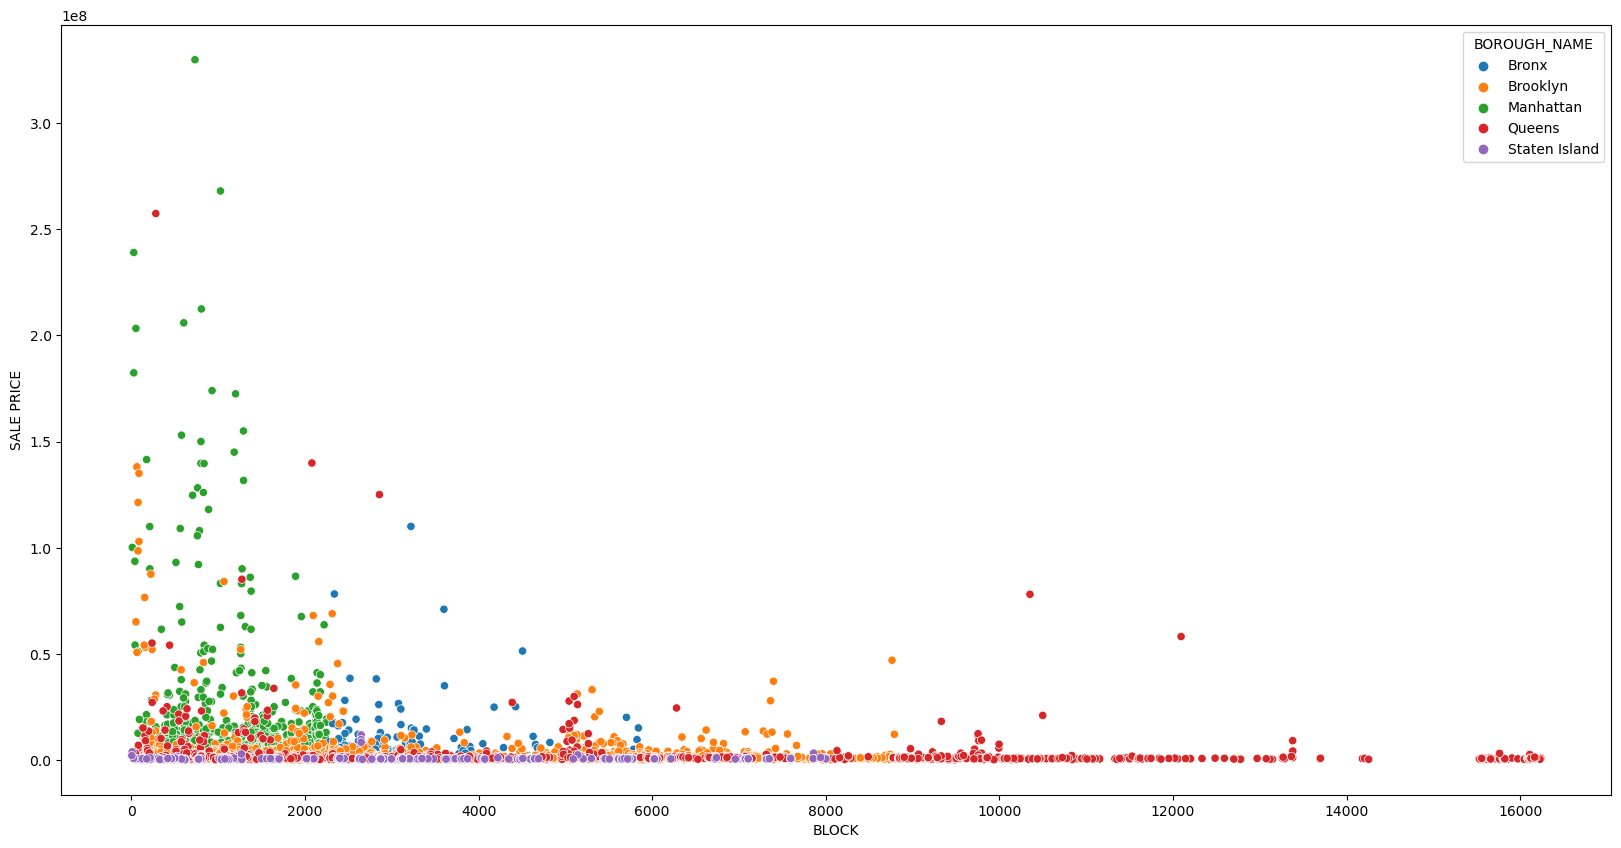

In [15]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=clean.df_housing, x="BLOCK", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)

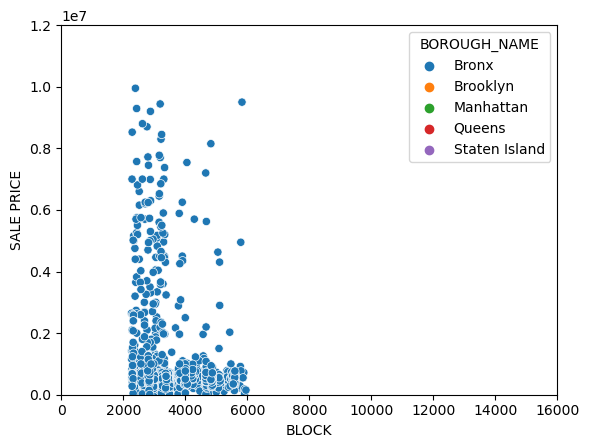

<Figure size 2000x1000 with 0 Axes>

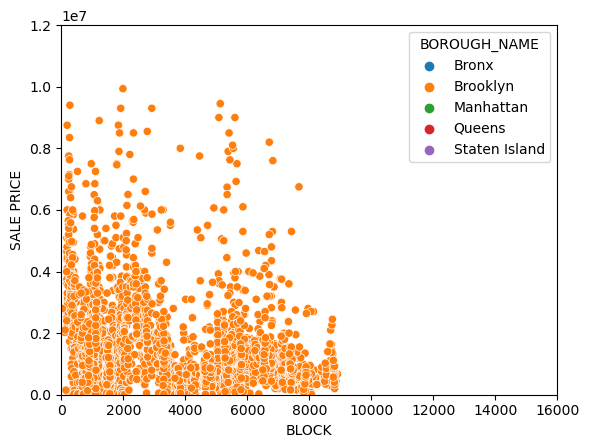

<Figure size 2000x1000 with 0 Axes>

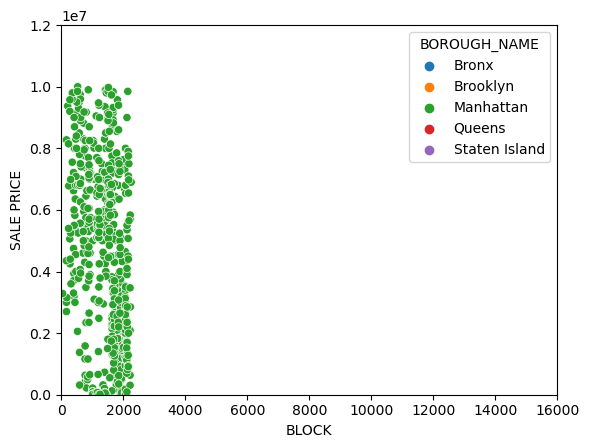

<Figure size 2000x1000 with 0 Axes>

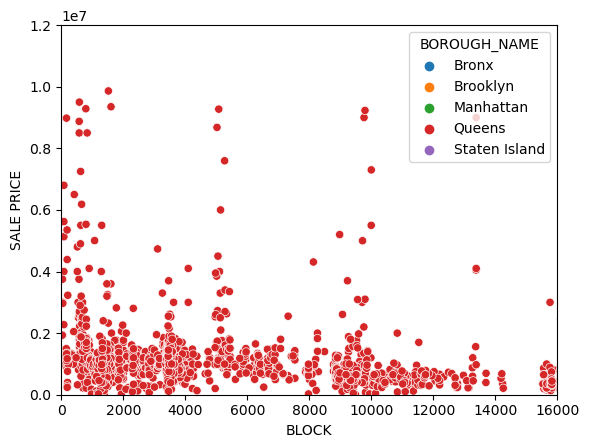

<Figure size 2000x1000 with 0 Axes>

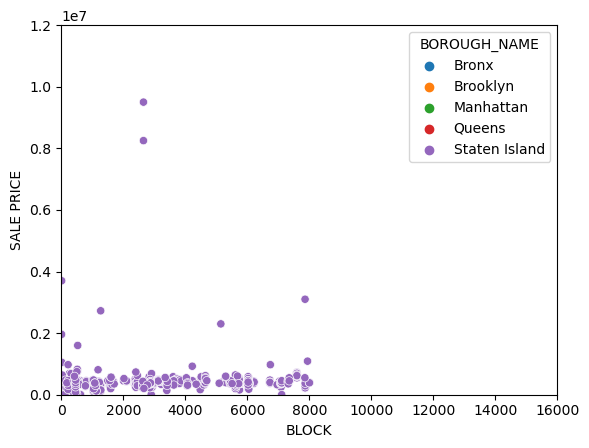

<Figure size 2000x1000 with 0 Axes>

In [16]:
for name in borough_names:
    fig, ax = plt.subplots()
    df_borough_housing = df_new_housing[df_new_housing["BOROUGH_NAME"] == name]
    plt.figure(figsize = (20,10))
    sns.scatterplot(data=df_borough_housing, x="BLOCK", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names, ax=ax)
    ax.set_xlim(0,16000)
    ax.set_ylim(0,12000000)